  EventID  Count
0    4688      9


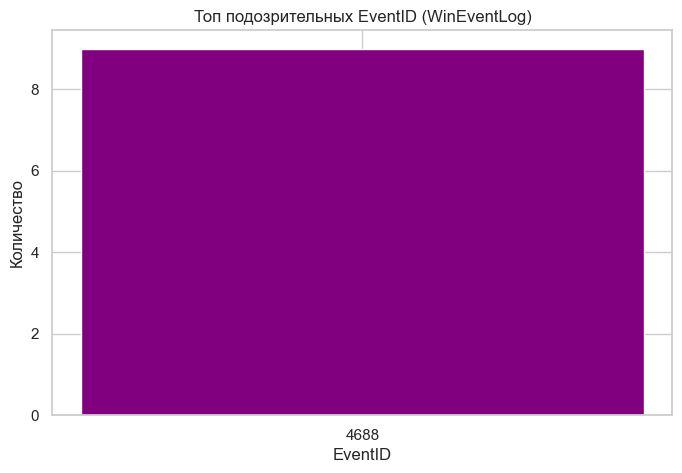

In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Загрузка файла botsv1.json
with open("botsv1.json", "r", encoding="utf-8") as f:
    raw = json.load(f)

records = [entry["result"] for entry in raw]
df = pd.DataFrame(records)
df.columns = df.columns.str.lower()

# Подозрительные EventID
suspicious_ids = [4625, 4673, 4674, 4688, 4697, 7045]

# Поиск по EventID
candidate_cols = [c for c in df.columns if "event" in c]

results = []

for col in candidate_cols:
    try:
        temp = pd.to_numeric(df[col], errors="coerce")
        found = temp[temp.isin(suspicious_ids)]
        if not found.empty:
            results.append(found)
    except:
        pass

if not results:
    print("В файле нет подозрительных EventID.")
else:
    # Объединяем найденные значения
    all_found = pd.concat(results)

    # Превращаем в DataFrame
    top_win = (
        all_found.value_counts()
        .reset_index()
    )
    top_win.columns = ["EventID", "Count"]

    # Приводим типы
    top_win["EventID"] = top_win["EventID"].astype(str)
    top_win["Count"] = top_win["Count"].astype(int)

    print(top_win)

    # Визуализация
    plt.figure(figsize=(8,5))
    plt.bar(top_win["EventID"], top_win["Count"], color="purple")
    plt.title("Топ подозрительных EventID (WinEventLog)")
    plt.xlabel("EventID")
    plt.ylabel("Количество")
    plt.show()








